# Cross Validation
We will generate a dummy dataset for regression and demonstrate how to perform 3-fold, 5-fold, 10-fold, and leave-one-out cross-validation for regression models. Finally, we will compare the results to understand the performance of each approach.

## Setup

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Generate Dummy Dataset
Let's generate a dummy dataset for regression analysis using NumPy.

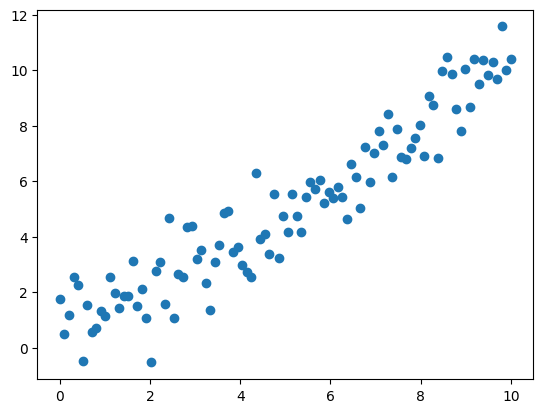

In [9]:
# Generating a dummy dataset
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = X  + np.random.normal(0, 1, X.shape[0]).reshape(-1, 1)
plt.scatter(X, y)

## Cross Validation
Now, we'll perform cross-validation using different techniques and compare the results.

In [20]:
# Create a list to store the mean squared errors for different cross-validation techniques
mse_scores = []

# List of cross-validation techniques to be used
cv_methods = ['3-fold', '5-fold', '10-fold', 'Leave-One-Out']

for cv_method in cv_methods:
    if cv_method == '3-fold':
        cv = KFold(n_splits=3, shuffle=True, random_state=0)
    elif cv_method == '5-fold':
        cv = KFold(n_splits=5, shuffle=True, random_state=0)
    elif cv_method == '10-fold':
        cv = KFold(n_splits=10, shuffle=True, random_state=0)
    else:
        cv = LeaveOneOut()

    # Create and fit the linear regression model using cross-validation
    model = LinearRegression()
    mse_scores_cv = []

    for train_idx, test_idx in cv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mse_scores_cv.append(mse)

    mse_scores.append(np.mean(mse_scores_cv))

# Display the mean squared errors for different cross-validation techniques
for i, cv_method in enumerate(cv_methods):
    print(f"{cv_method} Cross-Validation - Mean Squared Error: {mse_scores[i]:.4f}")

3-fold Cross-Validation - Mean Squared Error: 1.0650
5-fold Cross-Validation - Mean Squared Error: 1.0840
10-fold Cross-Validation - Mean Squared Error: 1.0566
Leave-One-Out Cross-Validation - Mean Squared Error: 1.0510


## Visualization
We can also visualize the mean squared errors for different cross-validation techniques using a bar plot.

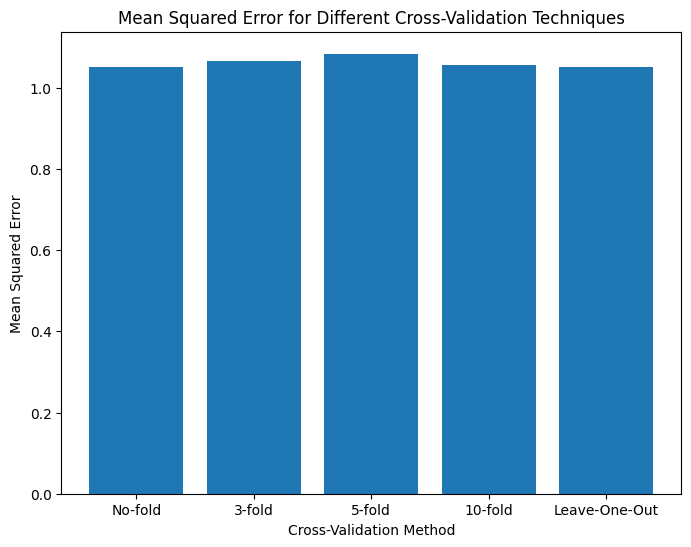

In [19]:
# Plotting mean squared errors for different cross-validation techniques
plt.figure(figsize=(8, 6))
plt.bar(cv_methods, mse_scores)
plt.xlabel("Cross-Validation Method")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error for Different Cross-Validation Techniques")
plt.show()
